In [3]:

library(tidyverse)


players_raw <- read_csv("players.csv")
sessions_raw <- read_csv("sessions.csv")

glimpse(players_raw)
glimpse(sessions_raw)

head(players_raw)
tail(players_raw)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:
players_clean <- players_raw |>
  select(subscribe, Age, played_hours) |>
  mutate(
    subscribe = case_when(
      subscribe %in% c(TRUE, "TRUE", 1L, "1")   ~ "Yes",
      subscribe %in% c(FALSE, "FALSE", 0L, "0") ~ "No",
      TRUE                                      ~ NA_character_
    ),
    subscribe = factor(subscribe, levels = c("No", "Yes"))
  ) |>
  filter(!is.na(subscribe),
         !is.na(Age),
         !is.na(played_hours))

head(players_clean)
summary(players_clean)


subscribe,Age,played_hours
<fct>,<dbl>,<dbl>
Yes,9,30.3
Yes,17,3.8
No,17,0.0
Yes,21,0.7
Yes,21,0.1
Yes,17,0.0


 subscribe      Age         played_hours    
 No : 52   Min.   : 9.00   Min.   :  0.000  
 Yes:142   1st Qu.:17.00   1st Qu.:  0.000  
           Median :19.00   Median :  0.100  
           Mean   :21.14   Mean   :  5.905  
           3rd Qu.:22.75   3rd Qu.:  0.600  
           Max.   :58.00   Max.   :223.100  

In [5]:
overall_summary <- players_clean |>
  summarize(
    n_players    = n(),
    mean_age     = round(mean(Age), 2),
    sd_age       = round(sd(Age), 2),
    mean_hours   = round(mean(played_hours), 2),
    sd_hours     = round(sd(played_hours), 2)
  )

overall_summary

by_sub_summary <- players_clean |>
  group_by(subscribe) |>
  summarize(
    n_players  = n(),
    mean_age   = round(mean(Age), 2),
    sd_age     = round(sd(Age), 2),
    mean_hours = round(mean(played_hours), 2),
    sd_hours   = round(sd(played_hours), 2)
  )

by_sub_summary


n_players,mean_age,sd_age,mean_hours,sd_hours
<int>,<dbl>,<dbl>,<dbl>,<dbl>
194,21.14,7.39,5.9,28.5


subscribe,n_players,mean_age,sd_age,mean_hours,sd_hours
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
No,52,23.75,9.38,0.50,1.19
Yes,142,20.18,6.28,7.88,33.11


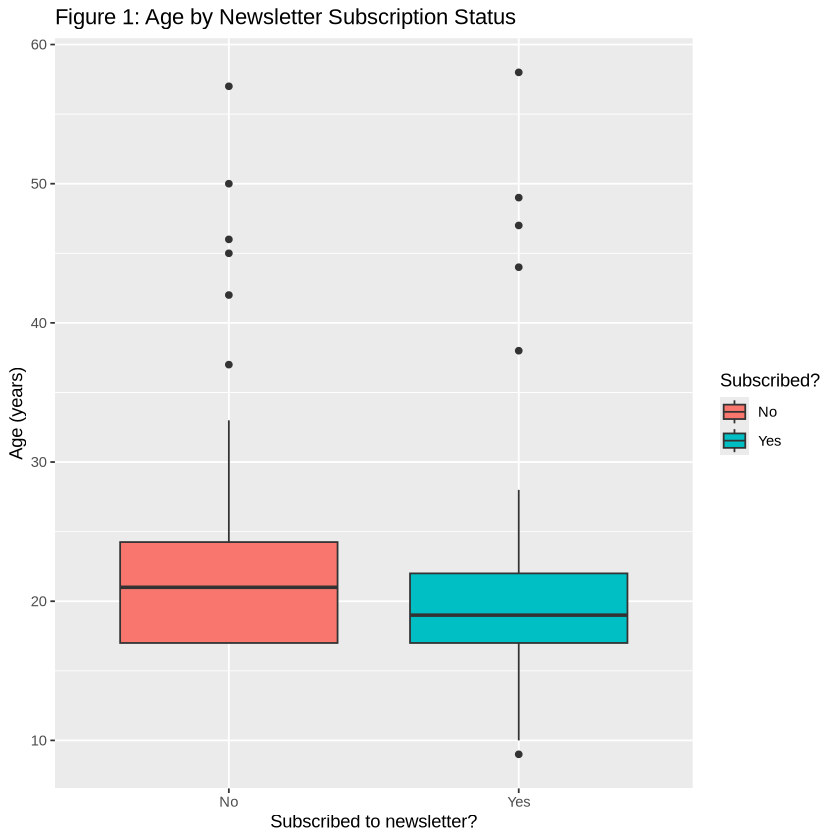

In [6]:
fig1_age_box <- players_clean |>
  ggplot(aes(x = subscribe, y = Age, fill = subscribe)) +
  geom_boxplot() +
  labs(
    title = "Figure 1: Age by Newsletter Subscription Status",
    x = "Subscribed to newsletter?",
    y = "Age (years)",
    fill = "Subscribed?"
  )

fig1_age_box


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


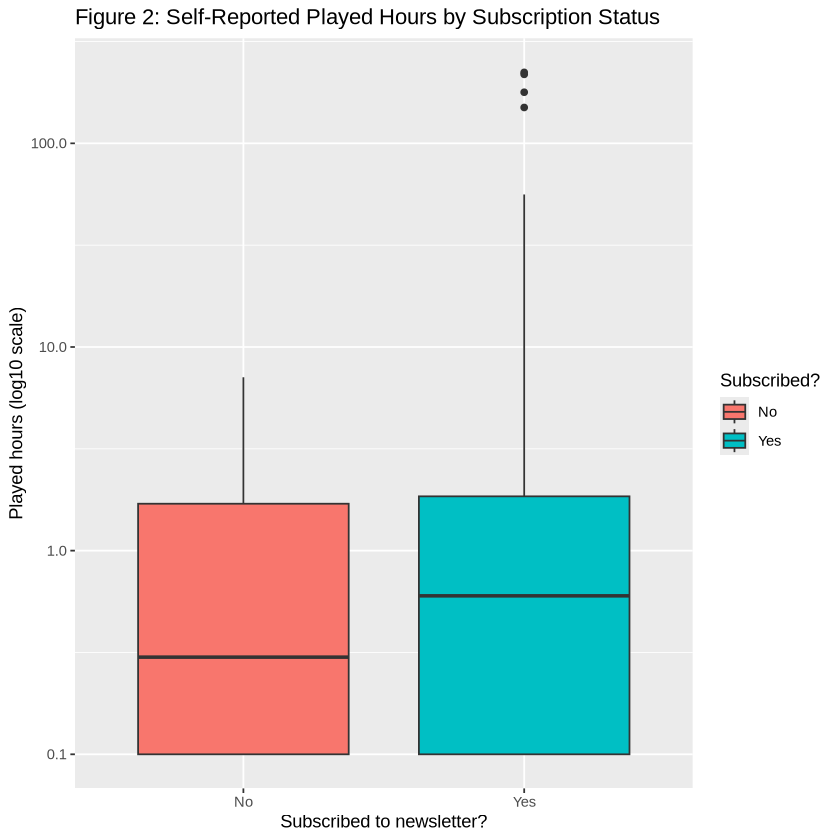

In [7]:
fig2_hours_box <- players_clean |>
  ggplot(aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(
    title = "Figure 2: Self-Reported Played Hours by Subscription Status",
    x = "Subscribed to newsletter?",
    y = "Played hours (log10 scale)",
    fill = "Subscribed?"
  )

fig2_hours_box


In [8]:
set.seed(123)

n <- nrow(players_clean)
train_size <- floor(0.75 * n)
train_indices <- sample(seq_len(n), size = train_size)

players_train <- players_clean[train_indices, ]
players_test  <- players_clean[-train_indices, ]

nrow(players_train)
nrow(players_test)


[1] 145

[1] 49

In [9]:
logit_model <- glm(
  subscribe ~ Age + played_hours,
  data   = players_train,
  family = binomial
)

summary(logit_model)


Call:
glm(formula = subscribe ~ Age + played_hours, family = binomial, 
    data = players_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)   1.72413    0.59042   2.920   0.0035 **
Age          -0.03976    0.02580  -1.541   0.1233   
played_hours  0.05616    0.05981   0.939   0.3477   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 170.81  on 144  degrees of freedom
Residual deviance: 164.40  on 142  degrees of freedom
AIC: 170.4

Number of Fisher Scoring iterations: 7


In [10]:
players_test_pred <- players_test |>
  mutate(
    prob_yes   = predict(logit_model, newdata = players_test, type = "response"),
    pred_class = if_else(prob_yes >= 0.5, "Yes", "No"),
    pred_class = factor(pred_class, levels = levels(subscribe))
  )

head(players_test_pred)

conf_mat <- table(
  truth     = players_test_pred$subscribe,
  predicted = players_test_pred$pred_class
)

conf_mat

accuracy <- mean(players_test_pred$pred_class == players_test_pred$subscribe)
accuracy


subscribe,Age,played_hours,prob_yes,pred_class
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Yes,17,3.8,0.7793145,Yes
No,17,0.0,0.7404403,Yes
Yes,22,0.0,0.7004563,Yes
Yes,23,1.6,0.7108620,Yes
Yes,17,0.0,0.7404403,Yes
Yes,17,48.4,0.9773907,Yes


     predicted
truth No Yes
  No   3   9
  Yes  0  37

[1] 0.8163265

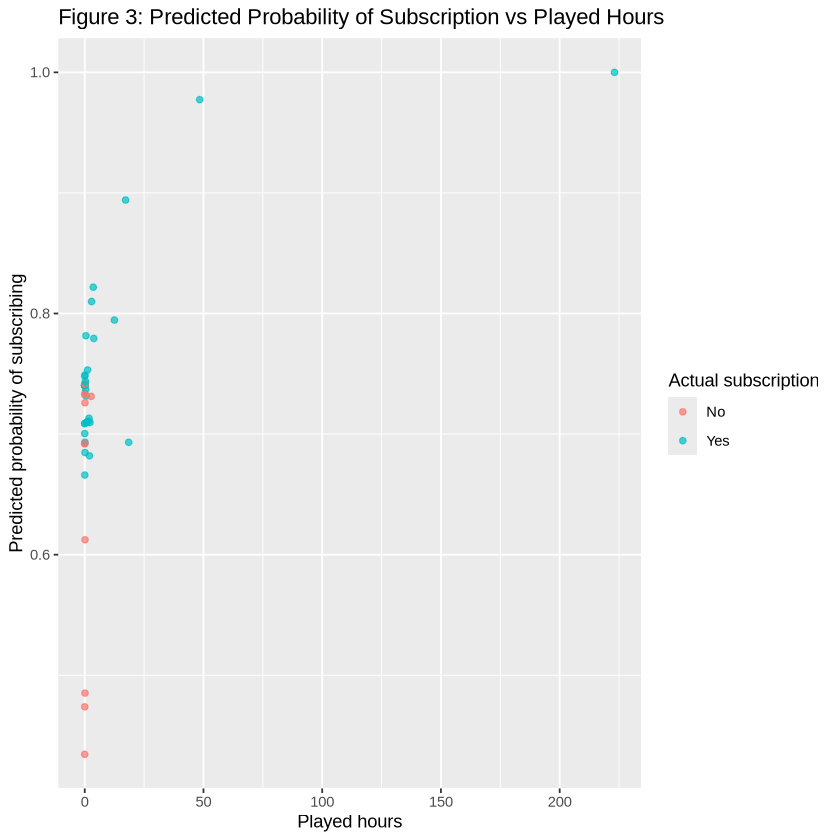

In [11]:
fig3_prob_hours <- players_test_pred |>
  ggplot(aes(x = played_hours, y = prob_yes, colour = subscribe)) +
  geom_point(alpha = 0.7) +
  labs(
    title = "Figure 3: Predicted Probability of Subscription vs Played Hours",
    x = "Played hours",
    y = "Predicted probability of subscribing",
    colour = "Actual subscription"
  )

fig3_prob_hours


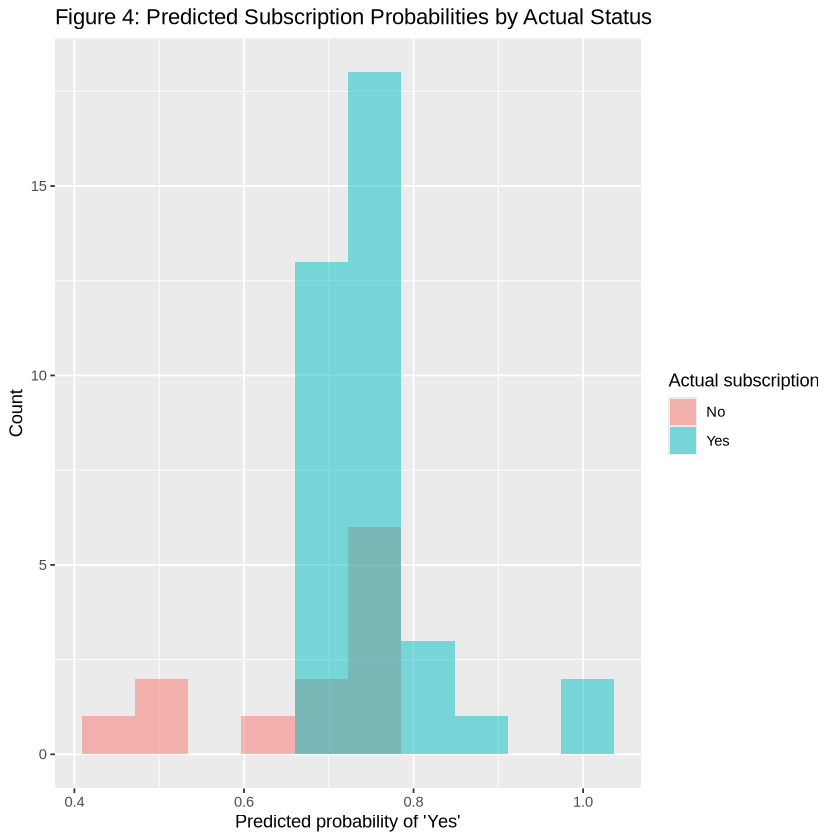

In [12]:
fig4_prob_hist <- players_test_pred |>
  ggplot(aes(x = prob_yes, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 10) +
  labs(
    title = "Figure 4: Predicted Subscription Probabilities by Actual Status",
    x = "Predicted probability of 'Yes'",
    y = "Count",
    fill = "Actual subscription"
  )

fig4_prob_hist
